In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
school_df = pd.read_csv("data/school data/Public_Schools.csv")

In [3]:
school_df = school_df[(school_df['COUNTRY']=='USA')&(school_df['STATE']!='AK')&(school_df['STATE']!='HI')]

In [4]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [46]:
school_df=pd.DataFrame(school_df[['NAME','LATITUDE','LONGITUDE']])

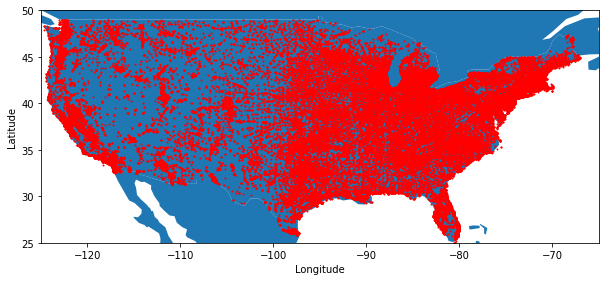

In [47]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(school_df['LONGITUDE'], df['LATITUDE'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_plot = world.plot(figsize=(10, 6))
world_plot.set_xlim([-125,-65])
world_plot.set_ylim([25,50])
world_plot.set_ylabel("Latitude")
world_plot.set_xlabel("Longitude")
gdf.plot(ax=world_plot, marker='o', color='red', markersize=1);

In [31]:
def distance_to_fire(fire_location,school_location):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(fire_location[0])
    lon1 = radians(fire_location[1])
    lat2 = radians(school_location[0])
    lon2 = radians(school_location[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [32]:
point1 = df.iloc[33,1:3]
point2 = df.iloc[7,1:3]
distance_to_fire(point1,point2)

2904.7465574982016

In [36]:
fire_df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/data/active_fire/c6/csv/MODIS_C6_USA_contiguous_and_Hawaii_24h.csv')

In [48]:
school_df.head()

,NAME,LATITUDE,LONGITUDE
0,ALDEN-HEBRON HIGH SCHOOL,42.465566,-88.431010
1,WESTERLY HILLS ACADEMY,35.231909,-80.911501
2,NORTHWOOD ELEMENTARY SCHOOL,39.489753,-86.062430
3,DR. GARY AND ANNETTE AUXIER ELEMENTARY SCHOOL,33.242888,-111.687306
4,DR. CAMILLE CASTEEL HIGH SCHOOL,33.222170,-111.683768


In [52]:
for row in fire_df.itertuples():
    fire_location = row[1],row[2]
    for school in school_df.itertuples():
        school_location = school[2],school[3]
        distance = distance_to_fire(fire_location,school_location)
        if distance < 1:
            print(f"WARNING. Evacuate {school[1]}")

WARNING. Evacuate CEDAR GROVE ELEMENTARY
WARNING. Evacuate CHERAW INTERMEDIATE
WARNING. Evacuate CHERAW HIGH
WARNING. Evacuate PLEASANT VALLEY INNOVATIVE SCHOOL
WARNING. Evacuate NEW BROCKTON HIGH SCHOOL
WARNING. Evacuate NEW BROCKTON HIGH SCHOOL
WARNING. Evacuate TRINDALE ELEMENTARY


KeyboardInterrupt: 

In [56]:
from tqdm import tqdm.notebook

SyntaxError: invalid syntax (<ipython-input-56-b730d442737f>, line 1)

In [55]:
accumulator = []
for school in (school_df.itertuples()):
    school_location = school[2],school[3]
    for fire in fire_df.itertuples():
        fire_location = row[1],row[2]
        distance = distance_to_fire(fire_location,school_location)
        if distance < 100:
            print(f"WARNING. Evacuate {school[1]}")
            accumulator.append(school[0])
            break

WARNING. Evacuate BISHOP INDEPENDENT STUDY
WARNING. Evacuate TIPTON ELEMENTARY
WARNING. Evacuate ACCELERATED CHARTER HIGH
WARNING. Evacuate RIDGEVIEW MIDDLE
WARNING. Evacuate WASHINGTON INTERMEDIATE
WARNING. Evacuate SEQUOIA UNION ELEMENTARY
WARNING. Evacuate LIBERTY ELEMENTARY
WARNING. Evacuate BIG PINE HIGH
WARNING. Evacuate FRANK KOHN ELEMENTARY
WARNING. Evacuate POLE CORRAL ELEMENTARY
WARNING. Evacuate OLIVE STREET ELEMENTARY
WARNING. Evacuate SOUTH FORK ELEMENTARY
WARNING. Evacuate EL DIAMANTE HIGH
WARNING. Evacuate CHARTER HOME SCHOOL ACADEMY
WARNING. Evacuate GLOBAL LEARNING CHARTER
WARNING. Evacuate RIO VISTA COMMUNITY DAY
WARNING. Evacuate OAK VALLEY ELEMENTARY
WARNING. Evacuate MOUNTAIN VIEW ELEMENTARY
WARNING. Evacuate TERRA BELLA ELEMENTARY
WARNING. Evacuate SHERIDAN ELEMENTARY
WARNING. Evacuate TULARE COUNTY COURT
WARNING. Evacuate SPRINGVILLE ELEMENTARY
WARNING. Evacuate KINGS CANYON UNIFIED SCHOOL DISTRICT WIDE PRESCHOOLS
WARNING. Evacuate KINGS RIVER ELEMENTARY
WARNING.

KeyboardInterrupt: 